## How to run this notebook
`bazel build  BilinearInterpolation:jupyter && ./bazel-bin/BilinearInterpolation/jupyter`


# Linear interpolation
Linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of two given known data points.
If the two points are given by the coordinates $(x_0, y_0)$ and $(x_1, y_1)$ then the linear interpolant is the straight line between these two points.

For an unknown point $x$ in the range, we can compute $y$ with 
$$ y = \frac{y_0(x_1 - x) + y_1(x-x_0)}{x_1 - x_0}$$


In [1]:
import inspect
from Interpolation.LinearInterpolation import LinearInterpolator
from ProjectiveGeometry.geometry import Point

print(inspect.getsource(LinearInterpolator))

class LinearInterpolator:
    def __init__(self, pointA: Point, pointB: Point):
        assert(pointA.x < pointB.x)
        self.pointA = pointA
        self.pointB = pointB
        
    def interpolate(self, x):
        num = self.pointA.y * (self.pointB.x - x) + self.pointB.y * (x - self.pointA.x)
        den = self.pointB.x - self.pointA.x
        return num / den



In [2]:
ptA = Point(0, 0)
ptB = Point(1, 1)
lnrI = LinearInterpolator(ptA, ptB)
lnrI.interpolate(0.5)

0.5


# Bilinear Interpolation
From Wikipedia: bilinear interpolation is a method for interpolating functions of two variables using linear interpolation. It is usually applied to 2D grids and this is what we will focus on.

## Principle
Bilinear interpolation is performed using linear interpolation first in one direction and then in the other direction.
Given 4 data points $Q_{11} = (x_1, y_1), Q_{12} = (x_1, y_2), Q_{21} = (x_2, y_1), Q_{22} = (x_2, y_2)$, we want to find the value of the unknown function $f$ at the point $(x, y)$. 

In [8]:
from ProjectiveGeometry.geometry import Point3D
from Interpolation.BilinearInterpolation import BilinearInterpolator

print(inspect.getsource(BilinearInterpolator))

class BilinearInterpolator:
    def __init__(self, Q11: Point3D, Q12: Point3D, Q21: Point3D, Q22: Point3D):
        assert(Q11.x == Q12.x) # x1
        assert(Q11.y == Q21.y) # y1
        assert(Q12.y == Q22.x) # y2
        assert(Q21.x == Q22.x) # x2
        self.Q11 = Q11
        self.Q12 = Q12
        self.Q21 = Q21
        self.Q22 = Q22
        
    def interpolate(self, x, y):
        assert(x <= self.Q22.x)
        assert(x >= self.Q11.x)
        assert(y <= self.Q22.y)
        assert(y >= self.Q11.y)
        
        # Interpolate in the x direction
        x_interpolator_y1 = LinearInterpolator(Point(self.Q11.x, self.Q11.z), Point(self.Q21.x, self.Q21.z))
        x_interpolator_y2 = LinearInterpolator(Point(self.Q12.x, self.Q12.z), Point(self.Q22.x, self.Q22.z))
        
        f_x_y1 = x_interpolator_y1.interpolate(x)
        f_x_y2 = x_interpolator_y2.interpolate(x)
        
        # Interpolate in the y direction
        y_interpolator = LinearInterpolator(Point(self.Q11.

In [4]:
Q11 = Point3D(0, 0, 0)
Q12 = Point3D(0, 1, 1)
Q21 = Point3D(1, 0, 1)
Q22 = Point3D(1, 1, 0.5)

blnrI = BilinearInterpolator(Q11, Q12, Q21, Q22)
blnrI.interpolate(0.5, 0.5)

0.625

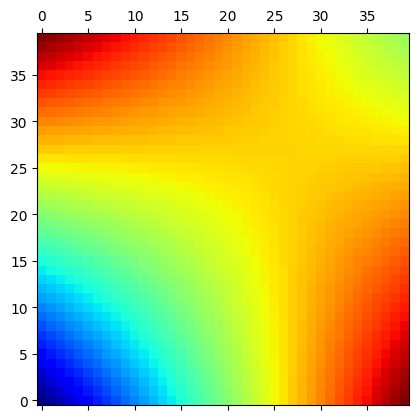

In [6]:
# Reproduce the wikipedia imageee
import matplotlib.pyplot as plt
import matplotlib

results = []
step = 40
i = 0
j = 0
for _ in range(step):
    j = 0
    row_i = []
    for _ in range(step):
        row_i.append(blnrI.interpolate(i, j))
        j+= 1/step
    i+=1/step
    results.append(row_i)
    
plt.matshow(results, cmap = matplotlib.colormaps["jet"], origin="lower")